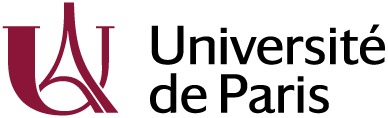
# Intro to Python - Class 2
## Sylvain Lobry, 17/10/2022

In today's class, we will see:
* More about strings
* Input/Output
* Functions
* Modules

## 1) Strings - Part 2

### 1.1) Back to formatting
During the first class, we saw how to use format to output a fixed point representation of a floating number. However, Python offers a lot of formatting options. Let's review the ones that could be useful for you in this section.

For any number, you can use:
* `+`: to always prefix the number by its sign (poitive or negative)
* `-`: to only prefix negative number by the `-` sign (this is the default behavior)
* ` `: to prefix positive number by a space, and the negative by a `-`

In [1]:
pos = 1/7
neg = -1/7

print("Positive number: {:+.2f}, negative number: {:+.2f}".format(pos, neg))
print("Positive number: {:-.2f}, negative number: {:-.2f}".format(pos, neg))
print("Positive number: {: .2f}, negative number: {: .2f}".format(pos, neg))

Positive number: +0.14, negative number: -0.14
Positive number: 0.14, negative number: -0.14
Positive number:  0.14, negative number: -0.14


For floating number, we have seen fixed point formatting `f`. There are other options:
* `e` and `E` to use the scientific notation. The difference between the two will be the capitalization of the "e" letter used before the exponent
* `f` and `F` to use fixed point notation. The difference between the two will be the capitalization of "not a number" and "infinity"
* `g` and `G`, which are called "general format": it will use either fixed-point or scientific notation based on the magnitude
* `%`: multiplies the number by 100 and adds a `%` sign after.

Here are some examples:

In [2]:
large_number = 3.42512345e17
nan = float("nan")
inf = float("inf")

print(f"Using {large_number}")
print("e formatting: {:.2e}".format(large_number))
print("E formatting: {:.2E}".format(large_number))
print("f formatting: {:.2f}".format(large_number))
print("F formatting: {:.2F}".format(large_number))
print("g formatting: {:.2g}".format(large_number))
print("G formatting: {:.2G}".format(large_number))

perc = 1.42
print(f"Using {perc}")
print("% formatting: {:%}".format(perc))

print(f"Using {nan}")
print("f formatting: {:f}".format(nan))
print("F formatting: {:F}".format(nan))
print(f"Using {inf}")
print("f formatting: {:f}".format(inf))
print("F formatting: {:F}".format(inf))

Using 3.42512345e+17
e formatting: 3.43e+17
E formatting: 3.43E+17
f formatting: 342512345000000000.00
F formatting: 342512345000000000.00
g formatting: 3.4e+17
G formatting: 3.4E+17
Using 1.42
% formatting: 142.000000%
Using nan
f formatting: nan
F formatting: NAN
Using inf
f formatting: inf
F formatting: INF


For integers, you can use the following formats:
* `b`: formats the number in binary
* `c`: converts to the corresponding unicode character
* `o`: formats in base 8
* `d`: formats in base 10 (this is the default)
* `x`: formats in hex, using lowercase letters
* `X`: formats in hex, using uppercase letters

Let's see some examples:

In [3]:
num = 42

print("b formatting: {:b}".format(num))
print("c formatting: {:c}".format(num))
print("o formatting: {:o}".format(num))
print("d formatting: {:d}".format(num))
print("x formatting: {:x}".format(num))
print("X formatting: {:X}".format(num))

b formatting: 101010
c formatting: *
o formatting: 52
d formatting: 42
x formatting: 2a
X formatting: 2A


Note that you can also use the precision specifier that we have seen before to truncate strings:

In [4]:
long_str = "Anticonstitutionnellement"

print("{:.8}".format(long_str))

Anticons


Finally, you can also align the output using the following specifiers:
* `<`: left-align within available space
* `>`: right align within available space
* `^`: center within available space

Optionally, you can put a filling character (defaults to space) before the alignment. Finally, the available space can be specified after the alignment:

In [5]:
print("{:=<42}".format("left")) #left align in a 42 width space and fill blanks with '='
print("{:>42}".format("right"))
print("{:^42}".format("center"))

left======================================
                                     right
                  center                  


For more details, you can consult the complete documentation: https://docs.python.org/3/library/string.html#formatspec

### 1.2) String as an array of characters
You should know that in C, a string is actually an array of characters. Python follows this philosophy by allowing a similar behavior between strings and lists.

Therefore, some methods defined on lists and that we have seen last time work for strings:

In [19]:
dummy_string = "Bonjour tout le monde!!"

print(dummy_string[2])
print(dummy_string[:7])
print(dummy_string[0:5:2]) #Go from index 0 to 5 with a step of 2
print(dummy_string[8:-1:2]) #Go from index 8 to the last with a step of 2
print(len(dummy_string))
print(dummy_string)

n
Bonjour
Bno
tu emne
23
Bonjour tout le monde!!


There are also other operations that work on lists (and on strings), that we did not have time to include in the last course:

In [7]:
print("t l" in dummy_string)
print("tout " not in dummy_string)
print(dummy_string.index("ou"))
print(dummy_string.count("ou"))

True
False
4
2


However, and this is important, strings in Python are NOT lists. Notably, they are read-only: once a string has been defined, you cannot modify it. Therefore, the following do NOT work:

In [8]:
dummy_string.append('!')
dummy_string[0] = 'b'

AttributeError: 'str' object has no attribute 'append'

### 1.3) Additional methods
In addition to the methods defined for lists and strings, there are additional specific methods which can be useful. We review some of them here.

#### Modification
It is possible to modify the case with `capitalize()`, `lower()` and `upper()`:

In [10]:
dummy_str = "bonjour Ã  tous. est-ce que Ã§a marche?"
print(dummy_str.capitalize())
dummy_str = dummy_str.upper()
print(dummy_str)
print(dummy_str.lower())

Bonjour Ã  tous. est-ce que Ã§a marche?
BONJOUR Ã€ TOUS. EST-CE QUE Ã‡A MARCHE?
bonjour Ã  tous. est-ce que Ã§a marche?


To modify some characters of a string, you can use `replace(old_str, new_str)` which will replace `old_str` by `new_str`:

In [11]:
dummy_str = "bonjour Ã  tous. bonjour"
print(dummy_str.replace("bonjour", "hello"))

hello Ã  tous. hello


#### Tests
You can check the extremities of a string with the methods `startswith()` and `endswith()`:

In [1]:
dummy_str = "bonjour Ã  tous"
print(dummy_str.startswith("bonjour"))
print(dummy_str.startswith("s"))
print(dummy_str.endswith("bonjour"))
print(dummy_str.endswith("s"))

True
False
False
True


In many cases, the extrimities of a string can contain undesired whitespaces which can be problematic, especially when checking them. In this case, it can be a good idea to call the method `strip()` which will remove trailing whitespaces:

In [13]:
dummy_str = "   bonjour Ã  tous "
print('|' + dummy_str + '|')
print('|' + dummy_str.strip() + '|')
print('|' + dummy_str + '|')

|   bonjour Ã  tous |
|bonjour Ã  tous|
|   bonjour Ã  tous |


You can also check the case of a string:

In [15]:
dummy_str = dummy_str.lower()
print(dummy_str.islower())

dummy_str = dummy_str.strip().capitalize()
print(dummy_str)
print(dummy_str.islower())

True
Bonjour Ã  tous
False


It is also possible to verify that a string contains a number using `isnumeric()`:

In [ ]:
dummy_str = "A number: 42"
print(dummy_str.isnumeric())
dummy_str = "42"
print(dummy_str.isnumeric())

#### Splitting
There is a method to break a string in chunks (e.g. words): `split()`. By default, it will split the strings around spaces. However, it is possible to specify a separator string (or character) `x` using `split(sep=x)`.

This method will return a list of the different chunks:

In [ ]:
dummy_str = "bonjour Ã  tous"
print(dummy_str.split())

dummy_str = "One, two, three"
print(dummy_str.split(sep=", "))

#### Joining
Finally, you can join strings in an iterable element (e.g. a list) to a single string using the `join()` method. Careful: this method needs to be called on the string that will actually join the strings in the iterable:

In [2]:
str_list = ["One", "two", "three"]
print(", ".join(str_list))

One, two, three


## 2) Input/output
### 2.1) Reading from the terminal
So far, we have only seen how to print information using the `print()` function. Of course, you can do much more I/O with Python (remember that it was one of the problem with ABC).

Let's first review how you can read from the command line using the `input()` function:

In [ ]:
print("What is your name?")
name = input()
print(f"Hello {name}")

As a shortcut, you can also put a prompt directly with the input function:

In [ ]:
name = input("What is your name?\n")
print(f"Hello {name}")

### 2.2) File manipulation
Python makes it rather easy to read or write to files. As an example, let's first create a file (note: in jupyter, any line starting with `!` will be interepreted as a bash command:

In [ ]:
!echo 'Bonjour les M1:\n- IAD\n- VMI' >> test_file.txt

Now we can use the function `open(filename)` to open the file. It will return a file object which can be manipulated. Of course `filename` is the name of your file (in a relative or absolute path). Be careful, this is plateform dependant. In addition, this command is often used using the `mode` argument indicating how the file object can be used. The mode can be:
* `'r'` for reading
* `'w'` for writing with truncation
* `'a'` for writing at the end of the file
* `'x'` for writing a file that does not exist yet (note: both 'w' and 'a' would work in this case, but 'x' will fail if the file already exist)

In addition, you can add `'+'` to any of these modes to open the file for both reading and writing
Finally, you can sepcify if the file is binary (`'b'`) or a text file (`'t'`)

By default, it will open the file for reading and consider it as a text file.

Importantly, you should never forget to close a file using the methode `close()` on the file object:

In [ ]:
my_file = open("test_file.txt")
my_file.close()

There are several methods to read a file. The most basic one is... `read()`; let's use it:

In [3]:
my_file = open("test_file.txt")
content = my_file.read()
my_file.close()
print(content)

FileNotFoundError: [Errno 2] No such file or directory: 'test_file.txt'

Before going further, note that this notation is quite heavy. Instead of explicitely calling `close()` (and potentially... forgetting) you can use the `with` statement:

In [ ]:
with open("test_file.txt") as my_file:
    content = my_file.read()
print(content)

If you are not convinced, you can check that a file is closed with the `closed()` method:

In [ ]:
with open("test_file.txt") as my_file:
    content = my_file.read()
    print(my_file.closed)
print(my_file.closed) #Note: do not do that, my_file might not be defined

We have seen how to read a file using `read()`. Two more methods can be useful: `readline()` and `readlines()`:

In [ ]:
with open("test_file.txt") as my_file:
    line = my_file.readline()
    while line:
        print(line, end="")
        line = my_file.readline()
    my_file.seek(0)
    lines = my_file.readlines()
    print(lines)
        

There are two things to note here:
* these methods do not remove the trailing newline character
* we used the `seek()` method that you should know from C

Finally, note that a file is an iterable. Therefore, there is one more elegant way to read a file:

In [ ]:
with open("test_file.txt") as my_file:
    for line in my_file:
        print(line, end='')

To write to a file, you can use the method `write()`. Do not forget to open your file in an appropriate mode:

In [ ]:
with open("test_file.txt", "a") as my_file:
    my_file.write("...")
    
with open("test_file.txt") as my_file:
    for line in my_file:
        print(line, end='')

Of course, you can use everything we have seen on strings here!

## 3) Functions

In most programming languages, functions are an unavoidable way to organize the code and reduce code duplication. Python is no exception. We have seen many examples of functions so far: `print`, `max`, `open`... These functions, as we have seen, are "built-in". We are now going to see how we can define our own functions.

To define a function with Python, you need to use the keyword `def` followed by the name of the function, the argument list and a `:`:

In [4]:
def boxed_print(to_print, boxing_character):
    print(boxing_character * (len(to_print) + 4))
    print(boxing_character + " " + to_print + " " + boxing_character)
    print(boxing_character * (len(to_print) + 4))
    
boxed_print("Bonjour Ã  tous!!", "=")

= Bonjour Ã  tous!! =


As you have seen, you can take several arguments (in this example, 2) and you define your function as a block. For your function to return a value, you need to use the return statement (careful, this is NOT a function).

In [ ]:
def identity(a):
    return a

As you can see from our first example, this statement is optional: a function does not have to return something. It can return any type of object including non basic types:

In [5]:
def build_list():
    return [3, "a", [42]]

def get_max_function():
    return max

print(build_list())
print(get_max_function()([3,4,5,6]))

[3, 'a', [42]]
6


When you omit the return statement, the function is actually returning None, a special value designating the absence of value. Therefore, the two following functions are equivalent:

In [6]:
def nothing_a():
    pass #i.e. do nothing

def nothing_b():
    pass
    return None

print(nothing_a())
print(nothing_b())

None
None


Due to its dynamic typing feature, you do not need to provide the type of the argument, nor the return type. This makes it particularly handy for generic programming:

In [7]:
def add(a, b):
    return a + b

print(add(3, 4))
print(add(3.2, 4.2))
print(add("bla", "bli"))
print(add("bla", 3))

7
7.4
blabli


TypeError: can only concatenate str (not "int") to str

It is also possible to use 'keyword arguments' for a function. Once again let's consider our fancy printing function:

In [ ]:
def boxed_print(to_print, boxing_character):
    print(boxing_character * (len(to_print) + 4))
    print(boxing_character + " " + to_print + " " + boxing_character)
    print(boxing_character * (len(to_print) + 4))
    
boxed_print(to_print = "Bonjour Ã  tous!!", boxing_character = "=")
boxed_print(boxing_character = "=", to_print = "Bonjour Ã  tous!!")

As you can see, in this case, we do not have to put the argument list in order. This can be particularly useful to make the source code more explicit. Furthermore, it can also be used to provide default arguments. Going back to our function:

In [ ]:
def boxed_print(to_print, boxing_character="*"):
    print(boxing_character * (len(to_print) + 4))
    print(boxing_character + " " + to_print + " " + boxing_character)
    print(boxing_character * (len(to_print) + 4))
    
boxed_print("Bonjour Ã  tous!!")
boxed_print("Bonjour Ã  tous!!", boxing_character="=")

In today's class, we will not see how to take a variable number of arguments, but know that it is possible.
Finally, note that it is possible to define anonymous function, a.k.a. lambda function. Here is a simple example:

In [ ]:
(lambda x: x + 1)(3)

## Modules
So far, we only worked with maximum one python file: either directly (with a \*.py file) or through a notebook (with a \*.ipynb file). While this is totally OK, it can be problematic when tackling rather large projects. In this case, you would want to divide your code in several source files. Moreover, you will want to use code written by other programmers (e.g. libraries); for now, we only used code from the core language, built-ins and our own.

To use code defined in another file, we need to use modules. We already encountered modules in the last lab when we did `import random`.

A module is another python file, most often containing definitions (i.e. objects, functions) and instructions. When you import the module (i.e. you make it available to the current script), the instructions are executed once. Let's see a simple example, using the file testmod.py. As you can see, this file needs to be in the same folder (for now):

In [ ]:
!cat testmod.py

The module can now be imported using the `import` keyword. Note that it will run the instructions:

In [ ]:
import testmod

And the definitions can be accessed from our main script using the syntax `name_of_the_module.name_of_the_element`:

In [ ]:
testmod.where_are_we()

Of course, you can have several definitions (or instructions in a module). For instance, let's define a new, similar module `testmod2`:

In [ ]:
!cat testmod2.py

In [ ]:
import testmod2

testmod2.where_are_we2()

Let's now look into more details at how we can import a module:

First, you can rename the module:

In [ ]:
import testmod2 as tm

tm.where_are_we2()

You can also import the definitions provided by the module in the local context, either by listing the definitions you want to import, or by using the keyword `*`:

In [ ]:
from testmod2 import where_are_we, where_are_we2
from testmod2 import *

where_are_we()

In [ ]:
!cat testmod3.py

In [ ]:
import testmod3

testmod3.where_are_we2()

And this variable is defined on every python file, including this one. Therefore, we can test it:

In [ ]:
print(__name__)

Therefore, you can have different behavior depending on how your file is executed. For instance, take:

In [ ]:
!cat testmod4.py

In [16]:
import testmod4

initializing the module...


In [ ]:
!python3.9 testmod4.py

This can be particularly helpful for testing.

## Conclusion
Today we have seen:
* More about strings
* Input/Output
* Functions
* Modules

On this last part, note that something important is that there are a lot of modules for Python